<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Jornada 2</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Solución Numérica de Ecuaciones Diferenciales Ordinarias (EDO) en 2D
    </p>
</div>

### **Resumen: Movimiento vertical con resistencia del aire**

En la **Jornada 1**, estudiamos el movimiento vertical de una partícula sometida a gravedad y a una fuerza de resistencia lineal del aire:

$$
F_r = -k v
$$

Aplicando la segunda ley de Newton:

$$
m\frac{dv}{dt} = -mg - kv
$$

con condiciones iniciales:

$$
v(0) = v_0,\qquad y(0) = y_0
$$

El sistema de ecuaciones diferenciales que describe la velocidad y la posición es:

$$
\frac{dv}{dt} = -g - \frac{k}{m}v,\qquad \frac{dy}{dt}=v
$$

Usando el **método de Euler (forward difference)** logramos encontrar de forma iterativa, la velocidad y posición de la partícula a partir de las condiciones iniciales:

$$
 \boxed{v_{n+1} = v_n + h\left(-g-\frac{k}{m}v_n\right)} \qquad 
\boxed{y_{n+1} = y_n + h\,v_n}
$$

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejemplo:** para $m=2\,\text{kg}$, $y_0=2000\,\text{m}$, $v_0=40\,\text{m/s}$, $k=0.2\,\text{kg/s}$ y $g=9.8\,\text{m/s}^2$ la velocidad y posición en función del tiempo es:

</div>

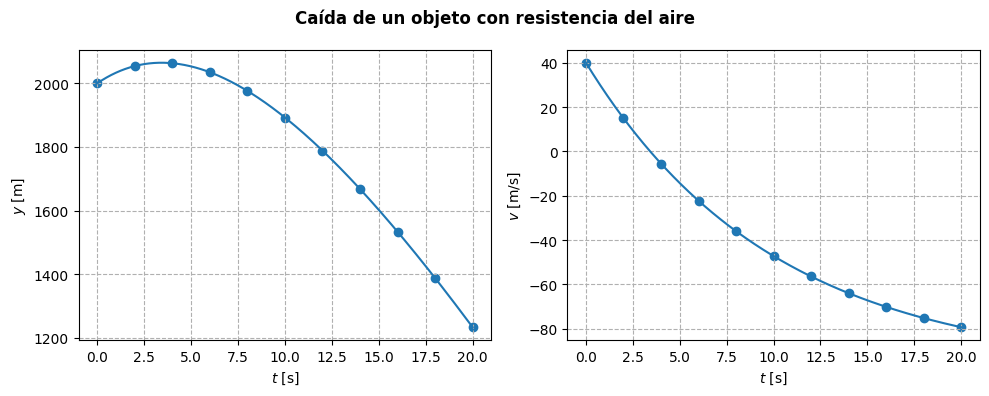

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple


def euler_method_second_order(
    f: Callable[[float, float, float], float],
    t0: float,
    y0: float,
    v0: float,
    tf: float,
    h: float = 1e-5,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Resuelve una ecuación diferencial de segundo orden de la forma
        v' = f(t, y, v)
        y' = v
    utilizando el método de Euler.

    Args:
        f (Callable): función que define la ecuación diferencial de segundo orden.
        t0 (float): tiempo inicial.
        y0 (float): posición inicial.
        v0 (float): velocidad inicial.
        tf (float): tiempo final.
        h (float, optional): tamaño de paso de tiempo. Por defecto: 1e-5.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: vectores de tiempo, posición y velocidad.
    """

    # inicializamos los vectores t, y, v
    t = np.arange(start=t0, step=h, stop=tf + h)
    y = np.zeros_like(t)
    v = np.zeros_like(t)

    # fijamos las condiciones iniciales
    y[0] = y0
    v[0] = v0

    # utilizamos la relación de recurrencia para encontrar las soluciones
    for n in range(len(t) - 1):
        v[n + 1] = v[n] + h * f(t[n], y[n], v[n])
        y[n + 1] = y[n] + h * v[n]

    return t, y, v


# definimos la función f(t, y, v) que describe la ecuación diferencial de segundo orden
def f(t, y, v):
    g = 9.8  # m/s^2
    m = 2  # kg
    k = 0.2  # kg/s

    return -g - k * v / m


# hacemos la llamada de la función para resolver el problema
t, y, v = euler_method_second_order(f=f, t0=0, y0=2000, v0=40, tf=20)

# graficamos los resultados en dos subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

axs[0].plot(t, y)
axs[0].scatter(t[::200000], y[::200000])  # puntos cada 200000 para mejor visualización
axs[0].set_ylabel(r"$y$ [m]")

axs[1].plot(t, v)
axs[1].scatter(t[::200000], v[::200000])  # puntos cada 200000 para mejor visualización
axs[1].set_ylabel(r"$v$ [m/s]")

for ax in axs:
    ax.grid(ls="--")
    ax.set_xlabel(r"$t$ [s]")

fig.suptitle("Caída de un objeto con resistencia del aire", fontweight="bold")
fig.tight_layout()

### **Extensión a 2D: Movimiento de proyectiles y otros sistemas**

¿Cómo aplicamos este método a problemas en dos dimensiones, como el **lanzamiento de proyectiles** o el **movimiento planetario** regido por la gravedad?

Partimos nuevamente de la **segunda ley de Newton**:

$$
\sum_i \vec{F}_i = \vec{F}_\text{neta} = m\,\vec{a}
$$

Aquí tanto la fuerza neta $\vec{F}_\text{neta}$ como la aceleración $\vec{a}$ son **vectores**, ya que trabajamos en 2D.

---

#### **Forma vectorial general**

El sistema de ecuaciones diferenciales se expresa de forma compacta como:

$$
\frac{d\vec{r}}{dt} = \vec{v}, \qquad
\frac{d\vec{v}}{dt} = \frac{\vec{F}_\text{neta}(t,\,\vec{r},\,\vec{v})}{m}
$$

donde:

- $\vec{r} = (x,\,y)$ es la posición,  
- $\vec{v} = (v_x,\,v_y)$ es la velocidad,  
- $\vec{F}_\text{neta}$ puede depender del tiempo, la posición y la velocidad.

---

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

#### **Método de Euler en forma vectorial**

Aplicando el **Método de Euler** (forward difference) para cada paso de tiempo $t_n \to t_{n+1}=t_n+h$, obtenemos dos relaciones de recurrencia, una para encontrar el vector posición futura y otra para el vector velocidad futura:

$$
\vec{v}_{n+1} = \vec{v}_n + h\,\vec{f}(t_n,\,\vec{r}_n,\,\vec{v}_n); \qquad \vec{r}_{n+1} = \vec{r}_n + h\,\vec{v}_n
$$

donde $\vec{f}(t_n,\,\vec{r}_n,\,\vec{v}_n) = \frac{\vec{F}_\text{neta}(t_n,\,\vec{r}_n,\,\vec{v}_n)}{m}$.

---

#### **Implementación en NumPy**

En Python/NumPy, podemos representar $\vec{r}$ y $\vec{v}$ como vectores o matrices, donde **cada columna** corresponde a una componente (por ejemplo, la primera columna $x$, la segunda $y$). Esto permite aplicar las operaciones de forma **vectorizada**, sin necesidad de tratar cada componente por separado:

```python
r = np.zeros((N, 2))  # columnas: [x, y]
v = np.zeros((N, 2))  # columnas: [vx, vy]
```
</div>

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 1:** *Lanzamiento parabólico (desarrollo teórico en pizarra)*

Se considera una partícula de masa $m=5\,\text{kg}$ con posición inicial $\vec{r}_0 = (10,\,50)\,\text{m}$ y velocidad inicial $\vec{v}_0 = (15,\,15)\,\text{m/s}$.

Determine y grafique la trayectoria de la partícula para $t \in [0,\,5]\,\text{s}$ utilizando el **método de Euler** con paso $h=0.01$ s.

1. **Sin resistencia del aire:**

$$
\frac{d\vec{v}}{dt} = (0,\,-g), \qquad
\frac{d\vec{r}}{dt} = \vec{v}
$$

2. **Con resistencia lineal del aire:**

$$
\frac{d\vec{v}}{dt} =
\left(
-\frac{k v_x}{m},\,
-\frac{k v_y}{m} - g
\right),
\qquad
\frac{d\vec{r}}{dt} = \vec{v}
$$

Considere $k=0.5\,\text{kg/s}$ y $m=5\,\text{kg}$.

</div>


In [26]:
# importamos librerías
import numpy as np
from typing import Callable, Tuple, Union

def euler_method_second_order_2D(
    f: Callable[[float, np.ndarray, np.ndarray], np.ndarray],
    t0: float,
    r0: Union[Tuple[float, float], np.ndarray],
    v0: Union[Tuple[float, float], np.ndarray],
    tf: float,
    h: float = 1e-5
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Resuelve una ecuación diferencial de segundo orden en 2D de la forma:
        v' = f(t, y, v)
        y' = v
    utilizando el método de Euler.

    Args:
        f (Callable): función que define la ecuación diferencial de segundo orden.
                      Debe retornar la aceleración como un np.ndarray (2,).
        t0 (float): tiempo inicial.
        r0 (tuple o np.ndarray): posición inicial (x0, y0).
        v0 (tuple o np.ndarray): velocidad inicial (vx0, vy0).
        tf (float): tiempo final.
        h (float, opcional): tamaño de paso de tiempo. Por defecto: 1e-5.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: vectores de tiempo, posiciones y velocidades.
            - t: np.ndarray de forma (N,)
            - y: np.ndarray de forma (N, 2)
            - v: np.ndarray de forma (N, 2)
    """
    r0 = np.array(r0, dtype=float)
    v0 = np.array(v0, dtype=float)
    
    n_steps = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, n_steps)
    
    r = np.zeros((n_steps, 2))
    v = np.zeros((n_steps, 2))
    
    r[0] = r0
    v[0] = v0
    
    for i in range(n_steps - 1):
        a = f(t[i], r[i], v[i])  # aceleración
        r[i+1] = r[i] + h * v[i]
        v[i+1] = v[i] + h * a
    
    return t, r, v


def f(t, r, v):
    g = 9.8 #m/s^2
    return np.array([0, -g])

def f_roce(t, r, v):
    g = 9.8 #m/s^2
    k = 0.5 #kg/s
    m=5 #kg
    return np.array([-k*v[0]/m, -g - k*v[1]/m])

t, r, v = euler_method_second_order_2D(f=f, t0=0, r0=(10, 50), v0=(15,15), tf=5, h=0.01)
t, r_roce, v_roce = euler_method_second_order_2D(f=f_roce, t0=0, r0=(10, 50), v0=(15,15), tf=5, h=0.01)

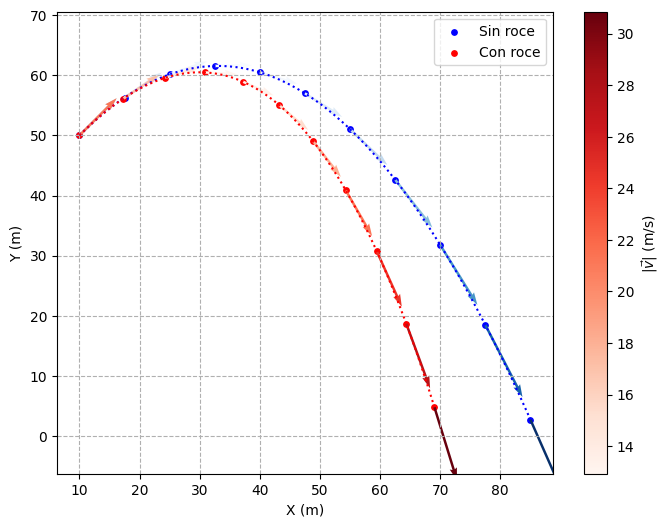

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer componentes de posición y velocidad
x, y = r[:, 0], r[:, 1]
x_roce, y_roce = r_roce[:, 0], r_roce[:, 1]

vx, vy = v[:, 0], v[:, 1]
vx_roce, vy_roce = v_roce[:, 0], v_roce[:, 1]

# Magnitud de la velocidad
v_mag = np.linalg.norm(v, axis=1)
v_mag_roce = np.linalg.norm(v_roce, axis=1)

# Intervalo de muestreo para las flechas
skip = 50

plt.figure(figsize=(8,6))

# Trayectoria y markers sin roce
plt.plot(x, y, ls=":", color="blue")
plt.scatter(x[::skip], y[::skip], s=15, color="blue", label="Sin roce")

# Trayectoria y markers con roce
plt.plot(x_roce, y_roce, ls=":", color="red")
plt.scatter(x_roce[::skip], y_roce[::skip], s=15, color="red", label="Con roce")

# Flechas de velocidad
plt.quiver(x[::skip], y[::skip], vx[::skip], vy[::skip], v_mag[::skip], cmap="Blues", scale=200, width=0.005)
plt.quiver(x_roce[::skip], y_roce[::skip], vx_roce[::skip], vy_roce[::skip], v_mag_roce[::skip], cmap="Reds", scale=200, width=0.005)

plt.colorbar(label=r"$|\vec{v}|$ (m/s)")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.grid(ls="--")
plt.axis("equal")
plt.legend()
plt.show()


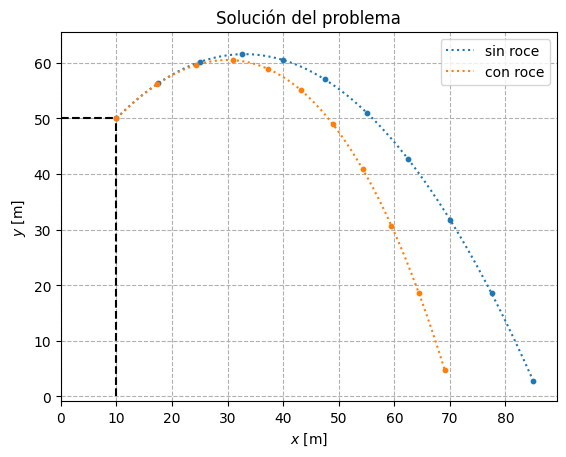

In [2]:
# definimos la ecuación diferencial del problema sin roce
def f_sin_roce(t, r, v):

    return ??

# definimos la ecuación diferencial del problema con roce
def f_roce(t, r, v):

    return ??

# hacemos la llamada de la funciones para resolver el problema


# Graficamos




<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Segundo ejemplo:** *Problema de dos cuerpos simplificado (desarrollo teórico en pizarra)*

Se considera el sistema **Sol-Tierra**, donde la Tierra se encuentra inicialmente en 
$\vec{r}_0 = (1.47 \times 10^{11},\, 0)$ m y el Sol está en el origen del sistema de referencia. La velocidad inicial de la Tierra es $\vec{v}_0 = (0,\, 30\,290)$ m/s.

Determine y grafique la trayectoria de la Tierra para $t \in [0,\,700]$ días utilizando el **método de Euler** con paso $h=1$ día.

El movimiento viene dado por la **segunda ley de Newton** y la **ley de gravitación universal**:

$$
\frac{d\vec{v}}{dt} = \left( -\frac{G M x}{r^3},\; -\frac{G M y}{r^3} \right), \qquad
\frac{d\vec{r}}{dt} = \vec{v}
$$

donde:

- $G = 6.672 \times 10^{-11} \;\text{Nm}^2/\text{kg}^2$ (constante de gravitación universal)  
- $M = 1.9891 \times 10^{30}\;\text{kg}$ (masa del Sol)

</div>


Text(0, 0.5, '$y$ [m]')

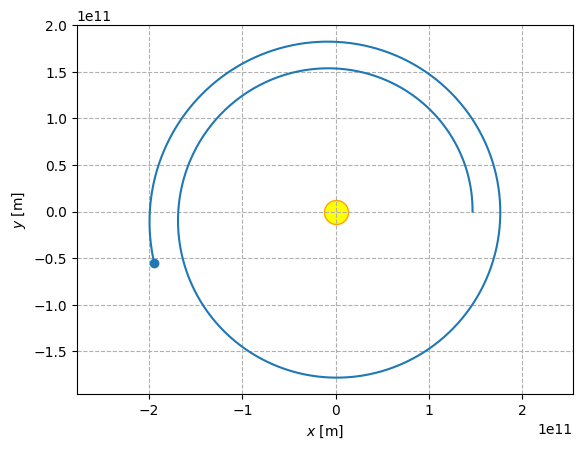

In [30]:
def f_gravitational(t, r, v):
    G = 6.672e-11 # constante de gravitación universal
    M = 1.9891e30 # masa del sol

    r_mag = np.sqrt(r[0]**2 + r[1]**2)

    return -G*M / r_mag**3 * np.array([r[0], r[1]])

t0 = 0 # s
tf = 700 * 24 * 3600 # s

h = 1 * 24 * 3600 # s

r0 = (1.47e11, 0) # m
v0 = (0, 30290)  # m/s
 

t, r, v = euler_method_second_order_2D(f=f_gravitational, t0=t0, r0=r0, v0=v0, tf=tf, h=h)

plt.scatter(0, 0, s=300, color="yellow", edgecolors="orange")
plt.scatter(r[-1,0], r[-1, 1])
plt.plot(r[:, 0], r[:, 1])
plt.grid(ls="--")
plt.axis("equal")

plt.xlabel(r"$x$ [m]")
plt.ylabel(r"$y$ [m]")


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Mejorar Precisión:** Resuelva nuevamente para $h=0.01$ días y para $t_f=365$ días. Grafique además los vectores de velocidad cada 20 días para visualizar los cambios de la velocidad a lo largo de la órbita, incluya una `colorbar` basada en la magnitud de la velocidad.
</div>

Text(0, 0.5, '$y$ [m]')

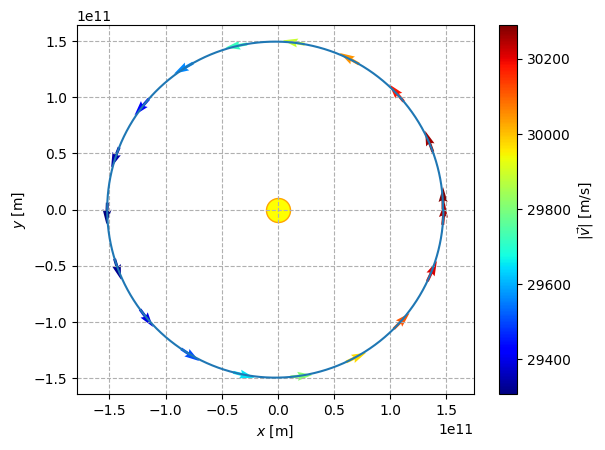

In [31]:
# su código acá

def f_gravitational(t, r, v):
    G = 6.672e-11 # constante de gravitación universal
    M = 1.9891e30 # masa del sol

    r_mag = np.sqrt(r[0]**2 + r[1]**2)

    return -G*M / r_mag**3 * np.array([r[0], r[1]])

t0 = 0 # s
tf = 365 * 24 * 3600 # s

h = 0.01 * 24 * 3600 # s

r0 = (1.47e11, 0) # m
v0 = (0, 30290)  # m/s
 

t, r, v = euler_method_second_order_2D(f=f_gravitational, t0=t0, r0=r0, v0=v0, tf=tf, h=h)

skip = int(20 / 0.01)

v_mag = np.linalg.norm(v, axis=1)

plt.quiver(r[::skip, 0], r[::skip, 1], v[::skip, 0], v[::skip, 1], v_mag[::skip], cmap="jet")

plt.colorbar(label=r"$|\vec{v}|$ [m/s]")

plt.scatter(0, 0, s=300, color="yellow", edgecolors="orange")
#plt.scatter(r[-1,0], r[-1, 1])
plt.plot(r[:, 0], r[:, 1])
plt.grid(ls="--")
plt.axis("equal")

plt.xlabel(r"$x$ [m]")
plt.ylabel(r"$y$ [m]")

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Análisis Energético:**  

Calcule la **energía cinética** $K$, la **energía potencial gravitatoria** $U$ y la **energía mecánica** $E$ de la Tierra para cada instante de tiempo:

$$
E = K + U = \frac{1}{2} m v^2 - \frac{G m M}{r}
$$

donde la masa de la Tierra es $m = 5.972 \times 10^{24}$ kg.

Grafique $K$, $U$ y $E$ en **subplots separados** y analice: ¿Se cumple el principio de **conservación de la energía**?

</div>


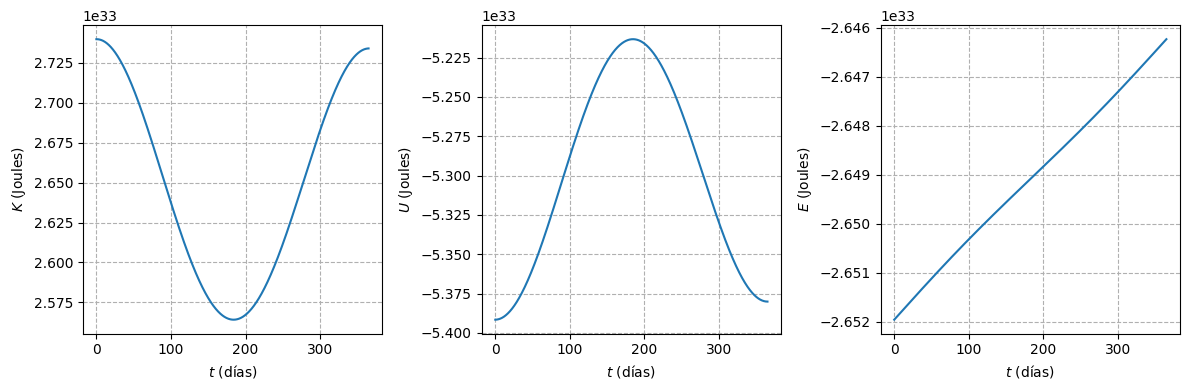

In [32]:
# Su código acá

G = 6.672e-11 # constante de gravitación universal
M = 1.9891e30 # masa del sol en kg
m = 5.972e24  # masa de la tierra en kg

K = 0.5 * m * np.linalg.norm(v, axis=1)**2
U =  - G * m * M / np.linalg.norm(r, axis=1)
E = K + U


fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

axs[0].plot(t / (3600 * 24), K)
axs[0].set_ylabel(r"$K$ (Joules)")

axs[1].plot(t / (3600 * 24), U)
axs[1].set_ylabel(r"$U$ (Joules)")

axs[2].plot(t / (3600 * 24), E)
axs[2].set_ylabel(r"$E$ (Joules)")

for ax in axs:
    ax.set_xlabel(r"$t$ (días)")
    ax.grid(ls="--")

fig.tight_layout()

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Análisis Energético durante 10 años:**  

Repita el cálculo de la trayectoria de la Tierra hasta $t_f = 10$ años.  
Calcule la **energía cinética** $K$, la **energía potencial gravitatoria** $U$ y la **energía mecánica** $E$ para cada instante de tiempo:

$$
E = K + U = \frac{1}{2} m v^2 - \frac{G m M}{r}
$$

donde la masa de la Tierra es $m = 5.972 \times 10^{24}$ kg.

Grafique $K$, $U$ y $E$ en **subplots separados**.

</div>


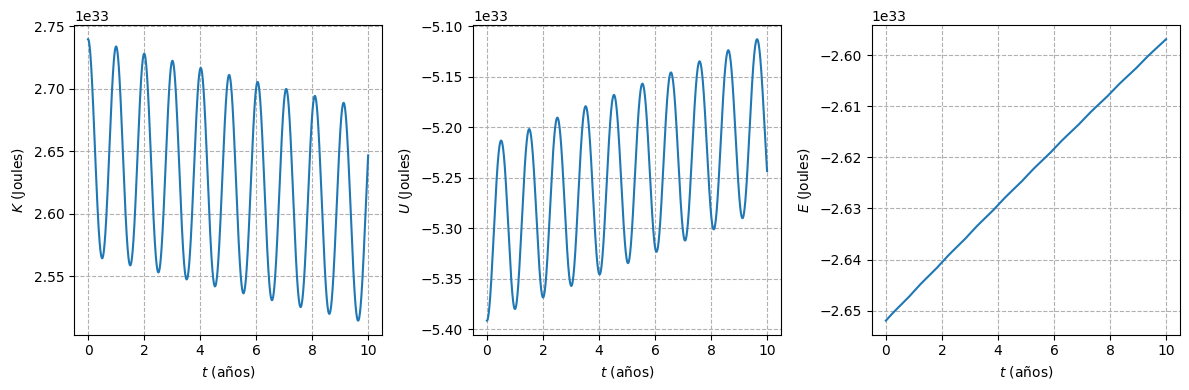

In [34]:
# Su código acá

t0 = 0 # s
tf = 10 * 365 * 24 * 3600 # s

h = 0.01 * 24 * 3600 # s

r0 = (1.47e11, 0) # m
v0 = (0, 30290)  # m/s
 

t, r, v = euler_method_second_order_2D(f=f_gravitational, t0=t0, r0=r0, v0=v0, tf=tf, h=h)

v_mag = np.linalg.norm(v, axis=1)

K = 0.5 * m * np.linalg.norm(v, axis=1)**2
U =  - G * m * M / np.linalg.norm(r, axis=1)
E = K + U


fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

axs[0].plot(t / (3600 * 24 * 365), K)
axs[0].set_ylabel(r"$K$ (Joules)")

axs[1].plot(t / (3600 * 24 * 365), U)
axs[1].set_ylabel(r"$U$ (Joules)")

axs[2].plot(t / (3600 * 24 * 365), E)
axs[2].set_ylabel(r"$E$ (Joules)")

for ax in axs:
    ax.set_xlabel(r"$t$ (años)")
    ax.grid(ls="--")

fig.tight_layout()


<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:**  

- Aplicamos el **método de Euler** para resolver problemas de segundo orden en 2D, incluyendo el **lanzamiento parabólico** y el **problema simplificado Sol-Tierra**.  
- Aprendimos a representar cantidades vectoriales en coordenadas cartesianas y a actualizar simultáneamente posición y velocidad utilizando el método de Euler vectorial.  
- Calculamos trayectorias y analizamos la **energía cinética, potencial y mecánica** de la Tierra en órbita, observando que **el método de Euler no conserva la energía de manera adecuada**, especialmente en simulaciones a largo plazo.  
- Reconocimos las limitaciones del método de Euler y la necesidad de emplear métodos más precisos, como **Runge-Kutta**, para simulaciones de sistemas gravitacionales y movimientos prolongados.  

**Próxima Jornada:** Estudio de métodos de **Runge-Kutta** para mejorar la precisión en la resolución de problemas y simulaciones prolongadas en 2D.

</div>



<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional IV para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>